## Importing Libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
concrete_data=pd.read_csv("concrete_data.csv")
concrete_data.head()
mean_squared_error_list=[]


## Data preprocessing 
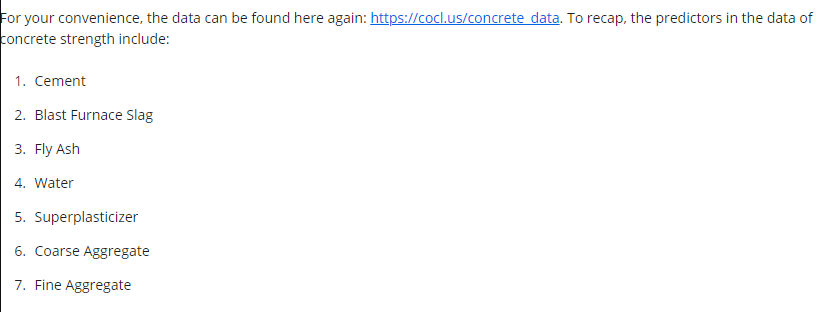

It means that the age col has to be dropped 

In [3]:
concrete_data.drop(columns='Age',inplace=True)

In [4]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.30


In [5]:
predictors_cols=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate']
target_col='Strength'
X=concrete_data[predictors_cols]
y=concrete_data[target_col]
print("the predictors are",X)
print("the target column is",y)

the predictors are       Cement  Blast Furnace Slag  ...  Coarse Aggregate  Fine Aggregate
0      540.0                 0.0  ...            1040.0           676.0
1      540.0                 0.0  ...            1055.0           676.0
2      332.5               142.5  ...             932.0           594.0
3      332.5               142.5  ...             932.0           594.0
4      198.6               132.4  ...             978.4           825.5
...      ...                 ...  ...               ...             ...
1025   276.4               116.0  ...             870.1           768.3
1026   322.2                 0.0  ...             817.9           813.4
1027   148.5               139.4  ...             892.4           780.0
1028   159.1               186.7  ...             989.6           788.9
1029   260.9               100.5  ...             864.5           761.5

[1030 rows x 7 columns]
the target column is 0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
 

## Model A
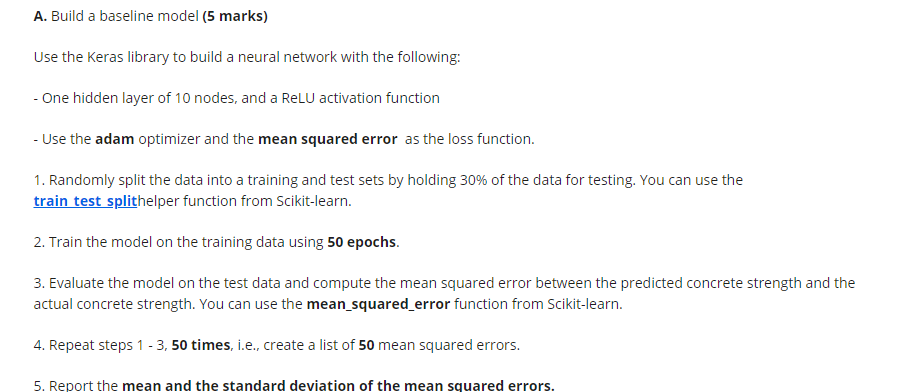

In [7]:
model=Sequential()

In [9]:
input_cols=X.shape[1]
input_cols

7

In [10]:
model.add(Dense(10,activation='relu',input_shape=(input_cols,)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
for i in range(50):
  #1.Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  model.fit(X_train,y_train,epochs=50)
  y_pred=model.predict(X_test)
  mean_error=mean_squared_error(y_test, y_pred)
  mean_squared_error_list.append(mean_error)


Streaming output truncated to the last 5000 lines.
Epoch 1/50
23/23 [==============================] - 14s 1ms/step - loss: 170094.6686
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 80232.9925
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 32974.9947
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 11294.6015
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 4106.3803
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 2168.7612
Epoch 7/50
23/23 [==============================] - 0s 1ms/step - loss: 1837.1566
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 1652.5875
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 1544.6066
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 1437.1121
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 1518.8176
Epoch 12/50
23/23 [====================

In [24]:
# converting the list to a numpy array 
array=np.array(mean_squared_error_list)


1

In [19]:
#calculating the mean 
array.mean()

168.02053067523804

In [20]:
#calculating the standard deviation 
array.std()

22.780777295260616